# Client Subscription Prediction Model Project

### Data Loading, Preprocessing and Analysis

In [3]:
#Importing Libraries for various stages of Analyses
##EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Feature preprocessing
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
##Model training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


## Loading dataset
bankdata = pd.read_csv('bank-full.csv', sep=';')

### Exploratory Data Analysis

In [5]:
bankdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bankdata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [9]:
print(bankdata.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [10]:
bankdata['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [11]:
bankdata['age'].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [12]:
bankdata['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [13]:
bankdata['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [14]:
bankdata['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [15]:
bankdata['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

### Visualizations

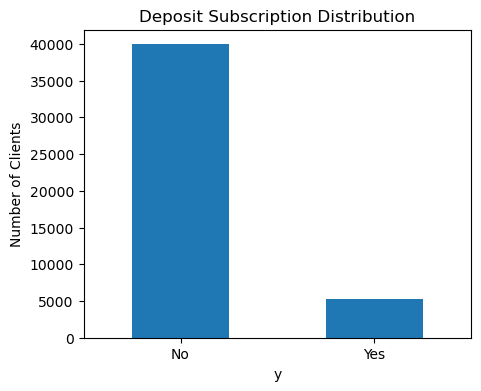

In [17]:
## Class distribution (target variable)
plt.figure(figsize=(5, 4))
bankdata['y'].value_counts().plot(kind='bar')
plt.title('Deposit Subscription Distribution')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Number of Clients') 
plt.savefig('sub_distribution.png') ## Saving image
plt.show()

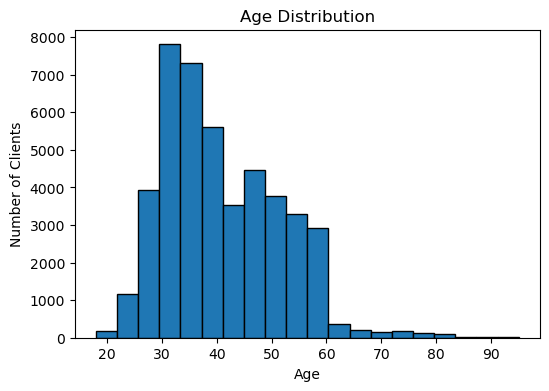

In [18]:
## Age distribution
plt.figure(figsize=(6, 4))
bankdata['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.savefig('age_distribution.png') # Saving image
plt.show()

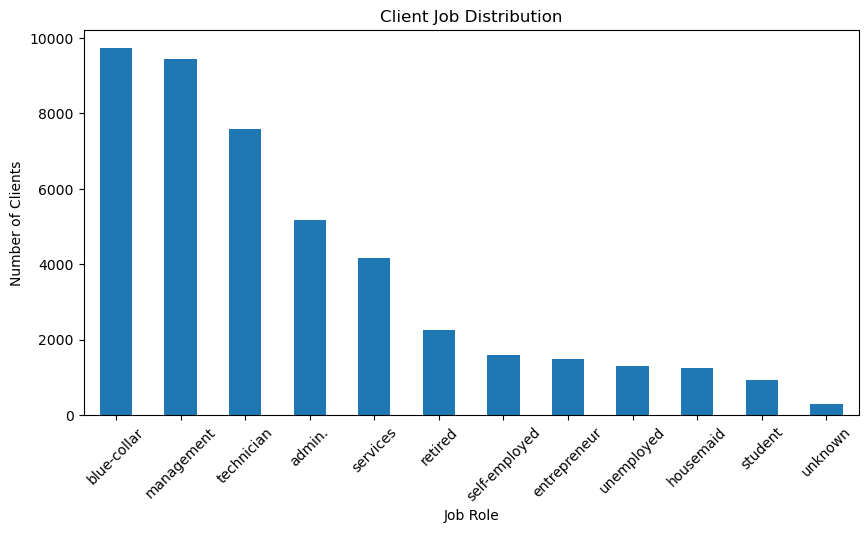

In [19]:
## Job distribution
plt.figure(figsize=(10, 5))
bankdata['job'].value_counts().plot(kind='bar')
plt.title('Client Job Distribution')
plt.ylabel('Number of Clients')
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.savefig('job_distribution.png') # Saving image
plt.show()

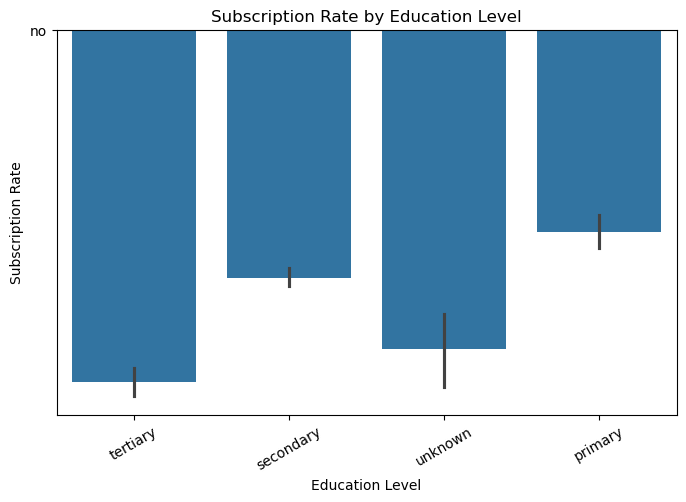

In [20]:
## Education vs Subscription Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=bankdata, x='education', y='y')
plt.title('Subscription Rate by Education Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=30)
plt.savefig('edu_distribution.png') # Saving image
plt.show()

### Feature Preprocessing and Evaluation

In [22]:
## Dropping 'duration' column to avoid data leakage
bankdata = bankdata.drop(columns=['duration'])

## Mapping target variable 'y' to binary
bankdata['y'] = bankdata['y'].map({'yes': 1, 'no': 0})

## Creating new binary feature 'contacted_before' from 'pdays'
bankdata['contacted_before'] = bankdata['pdays'].apply(lambda x: 0 if x == 999 else 1)
bankdata = bankdata.drop(columns=['pdays'])

In [23]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               45211 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  object
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day               45211 non-null  int64 
 10  month             45211 non-null  object
 11  campaign          45211 non-null  int64 
 12  previous          45211 non-null  int64 
 13  poutcome          45211 non-null  object
 14  y                 45211 non-null  int64 
 15  contacted_before  45211 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [24]:
bankdata.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,contacted_before
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,unknown,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,unknown,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,unknown,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,unknown,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,unknown,0,1


In [25]:
## Defining feature categories
numeric_features = ['age', 'balance', 'campaign', 'previous', 'campaign_efficiency']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'poutcome', 'age_group', 'balance_level']
binary_features = ['contact_recent', 'has_previous_contact']


## Building preprocessing pipelines for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # fills NaNs with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Combining pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', 'passthrough', binary_features)
])

## Full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [26]:
## Custom Transformer for Engineered Features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        bankdata = X.copy()

## Age group
bankdata['age_group'] = pd.cut(bankdata['age'], bins=[18, 30, 45, 60, 100],
        labels=['Young', 'Adult', 'Mature', 'Senior'])

## Was contacted recently
bankdata['contact_recent'] = bankdata['contacted_before'].apply(lambda x: 1 if x != 999 and x <= 30 else 0)

## Balance level
bankdata['balance_level'] = pd.qcut(bankdata['balance'], q=3, labels=['Low', 'Medium', 'High'])

## Has previous contact
bankdata['has_previous_contact'] = bankdata['previous'].apply(lambda x: 1 if x > 0 else 0)

## Campaign efficiency
bankdata['campaign_efficiency'] = bankdata['previous'] / (bankdata['campaign'] + 1)

print(bankdata.head(5))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... campaign  previous  poutcome  y  contacted_before  \
0  unknown    5  ...        1         0   unknown  0                 1   
1  unknown    5  ...        1         0   unknown  0                 1   
2  unknown    5  ...        1         0   unknown  0                 1   
3  unknown    5  ...        1         0   unknown  0                 1   
4  unknown    5  ...        1         0   unknown  0                 1   

   age_group contact_recent  balance_level has_previous_contact  \
0     Mature              1           High 

In [27]:
##  Defining features and target
X = bankdata.drop(columns=['y'])
y = bankdata['y']


##  Defining categorical columns and numerical columns excluding target
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

## Handling missing values (they appear as 'unknown' strings in categorical columns)
## Replacing 'unknown' with Nan for imputation
X[cat_cols] = X[cat_cols].replace('unknown', np.nan)

In [28]:
## Custom transformer to convert columns to categorical dtype 
class ToCategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col] = X[col].astype('category')
        return X



##  Fit preprocessor and transform data (example)
X_preprocessed = preprocessor.fit_transform(X)

print(f"Preprocessed feature matrix shape: {X_preprocessed.shape}")

Preprocessed feature matrix shape: (45211, 54)


### Model Training and Testing

In [30]:
## Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

## Full pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training model
pipeline.fit(X_train, y_train)

## Prediction and evaluation
y_pred = pipeline.predict(X_test)

## Defining model name and results container
name = 'Random Forest'
results = []

results.append({
    'Model': name,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
})

## Results
metric_result = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(metric_result)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.886431   0.574419  0.226398  0.324786


In [31]:
import joblib

## Retraining the classifier with class weights to improve model performance
## Combining X_train and X_test to ensure consistent encoding
X_combined = pd.concat([X_train, X_test])

## One-hot encode
X_encoded = pd.get_dummies(X_combined)

## Split back
X_train_encoded = X_encoded.iloc[:len(X_train), :]
X_test_encoded = X_encoded.iloc[len(X_train):, :]

model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
model_weighted.fit(X_train_encoded, y_train)

y_pred_weighted = model_weighted.predict(X_test_encoded)

##Saving model features
joblib.dump(X_train_encoded.columns.tolist(), "model_features.pkl")

## Defining model name and results container
name_weighted = 'Random Forest Weighted'
results_weighted = []

results_weighted.append({
    'Model': name_weighted,
    'Accuracy': accuracy_score(y_test, y_pred_weighted),
    'Precision': precision_score(y_test, y_pred_weighted),
    'Recall': recall_score(y_test, y_pred_weighted),
    'F1 Score': f1_score(y_test, y_pred_weighted)
})

## Results
metric_result_1 = pd.DataFrame(results_weighted).sort_values(by='F1 Score', ascending=False)
print(metric_result_1)

                    Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest Weighted  0.890523   0.636119  0.216315  0.322845


In [32]:
## Saving model pipeline
import joblib

joblib.dump(pipeline, "sub_pred_model.pkl", compress=5)
print("Model saved as sub_pred_model.pkl!")

Model saved as sub_pred_model.pkl!


### App Deployment

In [34]:
app_code= """

import streamlit as st
import joblib
import pandas as pd

## Loading model
model = joblib.load("sub_pred_model.pkl")
expected_cols = joblib.load("model_features.pkl")


## App title
st.title("📊 Bank Deposit Subscription Predictor")

## User inputs
age = st.slider("Age", 18, 95, 30)
job = st.selectbox("Job", ['admin.', 'technician', 'services', 'management', 'retired',
                           'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
                           'self-employed', 'student', 'unknown'])
marital = st.selectbox("Marital Status", ['married', 'single', 'divorced'])
education = st.selectbox("Education", ['primary', 'secondary', 'tertiary', 'unknown'])
default = st.selectbox("Has Credit Default?", ['yes', 'no'])
balance = st.number_input("Account Balance", step=100)
housing = st.selectbox("Has Housing Loan?", ['yes', 'no'])
loan = st.selectbox("Has Personal Loan?", ['yes', 'no'])
contact = st.selectbox("Contact Communication Type", ['cellular', 'telephone', 'unknown'])
month = st.selectbox("Last Contact Month", ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                                            'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
campaign = st.number_input("Number of Contacts During Campaign", min_value=1, max_value=50, value=1)
previous = st.number_input("Number of Previous Contacts", min_value=0, max_value=100, value=0)
poutcome = st.selectbox("Previous Outcome", ['success', 'failure', 'nonexistent'])

## Feature engineering
age_group = (
    "young" if age < 30 else
    "adult" if age < 60 else
    "senior"
)
balance_level = (
    "low" if balance < 0 else
    "medium" if balance < 1000 else
    "high"
)
campaign_efficiency = previous / campaign if campaign else 0

##  Input assembly
input_dictionary = {
    "age": age,
    "job": job,
    "marital": marital,
    "education": education,
    "default": default,
    "balance": balance,
    "housing": housing,
    "loan": loan,
    "contact": contact,
    "month": month,
    "campaign": campaign,
    "previous": previous,
    "previous_outcome": poutcome,
    "age_group": age_group,
    "balance_level": balance_level,
    "campaign_efficiency": campaign_efficiency
}

## Converting to DataFrame
input_frame = pd.DataFrame([input_dictionary])

## Encoding input to match model training
input_encoded = pd.get_dummies(input_frame)


## Aligning input with training features
input_aligned = input_encoded.reindex(columns=expected_cols, fill_value=0)

## Prediction
if st.button("Predict"):
    try:
        prediction = model.predict(input_aligned)
        result = "✅ Yes" if prediction[0] == 1 else "❌ No"
        st.success(f"Will the client subscribe? {result}")
    except Exception as e:
        st.error(f"Prediction failed: {e}")
        
"""

## Saving py file
with open("Bank_Sub.py", "w",encoding="utf-8") as f:
    f.write(app_code)

print("Streamlit app saved as Bank_Sub.py")

Streamlit app saved as Bank_Sub.py
